In [1]:
import illustris_python as il
import h5py
import numpy as np

import IPython

def listo():
    audio = IPython.display.Audio("/freya/u/mcastillo/home/notebooks/notification.mp3", autoplay=True)
    return(audio)

ModuleNotFoundError: No module named 'illustris_python'

In [2]:
basePath = '/virgotng/universe/IllustrisTNG/TNG50-1/output'
snapNum = 99
id = 372754
partType = "dm"
fields = ["ParticleIDs","Coordinates","Velocities","SubfindDMDensity","Potential"]

particle_data = il.snapshot.loadSubhalo(basePath,snapNum, id, partType, fields=fields)
subhalo_data = il.groupcat.loadSingle(basePath, snapNum, subhaloID=id)

with h5py.File(f"subhalo_{id}.hdf5", "w") as file:
    for key in particle_data.keys():
        file[f"99/{partType}/{key}"] = particle_data[key]
    for key in subhalo_data.keys():
        file[f"99"].attrs[key] = subhalo_data[key]

In [3]:
basePath = '/virgotng/universe/IllustrisTNG/TNG50-1/output'
snapNum = 99
id = 372754
partType = "star"
fields = ["ParticleIDs","Coordinates","Velocities","Masses","Potential"]

particle_data = il.snapshot.loadSubhalo(basePath,snapNum, id, partType, fields=fields)
subhalo_data = il.groupcat.loadSingle(basePath, snapNum, subhaloID=id)

with h5py.File(f"subhalo_{id}.hdf5", "r+") as file:
    for key in particle_data.keys():
        file[f"99/{partType}/{key}"] = particle_data[key]
    for key in subhalo_data.keys():
        file[f"99"].attrs[key] = subhalo_data[key]

### Area sandboxy

In [4]:
!ls -lh

total 692M
-rw-r--r-- 1 mcastillo mpa 306K Apr 10 17:55  first.ipynb
-rw-r--r-- 1 mcastillo mpa  14K Apr  3 23:32 'generate GSE (Naidu+ 2021) basis.ipynb'
-rw-r--r-- 1 mcastillo mpa 4.3M Apr 10 17:47  GSEbasis.empirical.cache
-rw-r--r-- 1 mcastillo mpa 8.0K Apr 10 17:44  GSEbasis_empirical.txt
-rw-r--r-- 1 mcastillo mpa 691M Apr 16 21:32  subhalo_372754.hdf5


In [5]:
subhalo_data["SubhaloPos"]

array([34925.098 ,  5239.3403, 21468.34  ], dtype=float32)

In [6]:
particle_data["count"]

3291046

In [7]:
with h5py.File(f"subhalo_{id}.hdf5", "r+") as file:
    print(file["99"].keys())
    print(file["99/dm"].keys())
    print(file["99/dm/Coordinates"][:])
    
with h5py.File(f"subhalo_{id}.hdf5", "r+") as file:
    print(file["99"].keys())
    print(file["99/star"].keys())
    print(file["99/star/Coordinates"][:,0])

<KeysViewHDF5 ['dm', 'star']>
<KeysViewHDF5 ['Coordinates', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'Velocities', 'count']>
[[34925.01689897  5239.27326651 21468.36787029]
 [34925.05157682  5239.37277033 21468.57804981]
 [34925.1548696   5239.50024577 21468.51112737]
 ...
 [   76.19897434  5030.13491773 22008.51552112]
 [  129.13865749  4880.60321697 21916.75533699]
 [34879.38893337  5190.07202671 21321.63607647]]
<KeysViewHDF5 ['dm', 'star']>
<KeysViewHDF5 ['Coordinates', 'Masses', 'ParticleIDs', 'Potential', 'Velocities', 'count']>
[34925.166014   34925.15700629 34925.13688907 ...    63.30201599
 34942.91833516 34979.54583628]


<KeysViewHDF5 ['dm', 'star']>
<KeysViewHDF5 ['Coordinates', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'Velocities', 'count']>


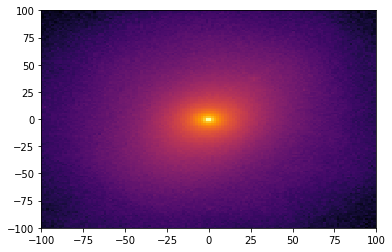

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

header_data = il.groupcat.loadHeader(basePath, snapNum)
header_data

with h5py.File(f"subhalo_{id}.hdf5", "r+") as file:
    print(file["99"].keys())
    print(file["99/dm"].keys())
    x = file["99/dm/Coordinates"][:,0]
    y = file["99/dm/Coordinates"][:,1]
    densities = file["99/dm/SubfindDMDensity"][:]
    subhalopos = file["99"].attrs["SubhaloPos"]
    L_box = header_data["BoxSize"]
    x-=subhalopos[0]
    y-=subhalopos[1]
    x_fix = np.where(abs(x) > L_box/2, L_box, 0)
    y_fix = np.where(abs(y) > L_box/2, L_box, 0)
    x+=x_fix
    y-=y_fix
    #plt.hist2d(x,y,bins=128,range=[[-100,100],[-100,100]],weights=densities,norm=mpl.colors.LogNorm(),cmap="inferno")
    plt.hist2d(x,y,bins=128,range=[[-100,100],[-100,100]],norm=mpl.colors.LogNorm(),cmap="inferno")

### Area de calculo epico!

In [9]:
header_data = il.groupcat.loadHeader(basePath, snapNum)
header_data

{'BoxSize': 35000.0,
 'FlagDoubleprecision': 0,
 'Git_commit': b'd203ec8b07c7e2bdda5f608aa0babea46d603699',
 'Git_date': b'Thu Apr 7 14:14:27 2016 +0200',
 'HubbleParam': 0.6774,
 'Ngroups_ThisFile': 1,
 'Ngroups_Total': 10247012,
 'Nids_ThisFile': 13513936,
 'Nids_Total': 9471772986,
 'Nsubgroups_ThisFile': 63864,
 'Nsubgroups_Total': 5688113,
 'NumFiles': 680,
 'Omega0': 0.3089,
 'OmegaLambda': 0.6911,
 'Redshift': 2.220446049250313e-16,
 'Time': 0.9999999999999998}

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

header_data = il.groupcat.loadHeader(basePath, snapNum)
h = header_data["HubbleParam"]

with h5py.File(f"subhalo_{id}.hdf5", "r+") as file:
    print(file["99"].keys())
    print(file["99/dm"].keys())
    r = file["99/dm/Coordinates"][:]
    subhalopos = file["99"].attrs["SubhaloPos"]
    L_box = header_data["BoxSize"]
    # Bring the coordinates to the center of the subhalo and fix periodicity
    for i in range(3):
        r[:,i] -= subhalopos[i]
        fix1 = np.where(r[:,i] > L_box/2, -L_box, 0)
        fix2 = np.where(r[:,i] < L_box/-2, L_box, 0)
        r[:,i] = r[:,i] + fix1 + fix2
    r /= h
    # xyz fixed!
    file["99/dm/Coordinates_centered"] = r
listo()

<KeysViewHDF5 ['dm', 'star']>
<KeysViewHDF5 ['Coordinates', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'Velocities', 'count']>


<KeysViewHDF5 ['dm', 'star']>
<KeysViewHDF5 ['Coordinates', 'Coordinates_centered', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'Velocities', 'count']>


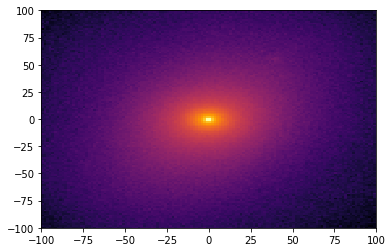

In [11]:
with h5py.File(f"subhalo_{id}.hdf5", "r") as file:
    print(file["99"].keys())
    print(file["99/dm"].keys())
    r = file["99/dm/Coordinates_centered"][:]
    dm_mass = 3.1e5/h
    x = r[:,0]
    y = r[:,1]
    z = r[:,2]
    plt.hist2d(x,y,bins=128,range=[[-100,100],[-100,100]],weights=np.full(len(x), dm_mass),norm=mpl.colors.LogNorm(),cmap="inferno")

#### Test de obtener modulo

In [12]:
with h5py.File(f"subhalo_{id}.hdf5", "r+") as file:
    print(file["99"].keys())
    print(file["99/dm"].keys())
    r = file["99/dm/Coordinates_centered"][:]
    R = [np.linalg.norm(v) for v in r]
listo()

<KeysViewHDF5 ['dm', 'star']>
<KeysViewHDF5 ['Coordinates', 'Coordinates_centered', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'Velocities', 'count']>


In [13]:
with h5py.File(f"subhalo_{id}.hdf5", "r+") as file:
    print(file["99"].keys())
    print(file["99/dm"].keys())
    r = file["99/dm/Coordinates_centered"][:]
    R2 = np.linalg.norm(r, axis=1)
listo()

<KeysViewHDF5 ['dm', 'star']>
<KeysViewHDF5 ['Coordinates', 'Coordinates_centered', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'Velocities', 'count']>


In [14]:
len(r),len(R),len(R2),sum(R-R2)

(10626687, 10626687, 10626687, 0.0)

#### obteniendo el modulo for real!

In [15]:
with h5py.File(f"subhalo_{id}.hdf5", "r+") as file:
    print(file["99"].keys())
    print(file["99/dm"].keys())
    r = file["99/dm/Coordinates_centered"][:]
    R = np.linalg.norm(r, axis=1)
    file["99/dm/Distance_to_center"] = R
listo()

<KeysViewHDF5 ['dm', 'star']>
<KeysViewHDF5 ['Coordinates', 'Coordinates_centered', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'Velocities', 'count']>


<KeysViewHDF5 ['dm', 'star']>
<KeysViewHDF5 ['Coordinates', 'Coordinates_centered', 'Distance_to_center', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'Velocities', 'count']>


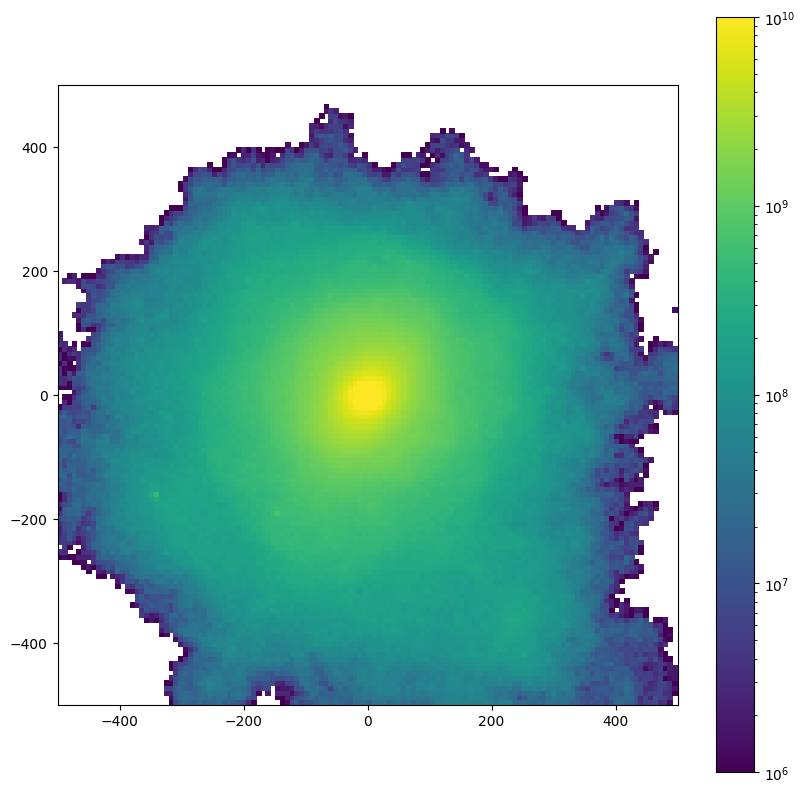

In [16]:
with h5py.File(f"subhalo_{id}.hdf5", "r") as file:
    print(file["99"].keys())
    print(file["99/dm"].keys())
    r = file["99/dm/Coordinates_centered"][:]
    dm_mass = 3.1e5/h
    figure = plt.figure(0,(10,10),dpi=100)
    plt.hist2d(r[:,0],r[:,1],bins=128,range=[[-500,500],[-500,500]],weights=np.full(len(r[:,0]), dm_mass),norm=mpl.colors.LogNorm(vmin=1e6,vmax=1e10))
    plt.gca().set_aspect('equal')
    plt.colorbar()
    plt.show()

<KeysViewHDF5 ['dm', 'star']>
<KeysViewHDF5 ['Coordinates', 'Coordinates_centered', 'Distance_to_center', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'Velocities', 'count']>


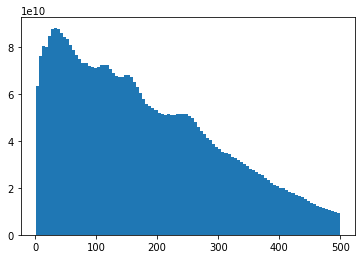

In [17]:
header_data = il.groupcat.loadHeader(basePath, snapNum)
h = header_data["HubbleParam"]

with h5py.File(f"subhalo_{id}.hdf5", "r") as file:
    print(file["99"].keys())
    print(file["99/dm"].keys())
    R = file["99/dm/Distance_to_center"][:]
    dm_mass = 3.1e5/h
    plt.hist(R, bins=100, weights=np.full(len(R), dm_mass),range=(1,500))

In [18]:
def density_calculation(R,weights=1.0,distrange=(-2,3),bins=100,surfacedens=False, scale='log'):
    """
    This function calculates the mass density of a set of particle, taking spherical shells
    --------------
    Parameters
    - R             : (np.array) Radii of the particles
    - weights       : (np.array or float) Either a float or an array, being the mass of the particles (default=1.0)
    - distrange     : (tuple) min R and max R (default=(1e-2,1e3))
    - bins          : (int) number of bins (default=100)
    - surfacedens   : (bool) whether to compute the density as surface density or not (default=False)
    - scale         : (str) either 'log' or 'linear'
    --------------
    Returns
    - rcentres      : (np.array) centers of the bins calculated
    - bin_length    : (float) the lenght(dR) of the bins calculated
    - densities     : (np.array) the mass densities calculated
    """
    # Calculate the bin_length or dR
    bin_length = (distrange[1]-distrange[0])/bins
    rcentres = np.zeros(bins)0
    densities = np.zeros(bins)

    # In case of weights being a float, make it an array
    if isinstance(weights, float) is True:
        w = weights*np.full(R.size, 1)
    else:
        w = weights
    # Now begin the calculation of densities
    if scale in ['lin','linear']:
        for i in range(0,bins):
            # Compute the given rcentre for this bin
            rcentres[i] = distrange[0] + bin_length*(i+0.5)
            # Compute Rmin and Rmax of the given bin
            Rmin = distrange[0] + bin_length*(i)
            Rmax = distrange[0] + bin_length*(i+1)
            # Calculate either the volume or surface
            if surfacedens is True:
                shell = np.pi*(rcentres[i]**2)
            else:
                shell = (4/3)*np.pi*(Rmax**3-Rmin**3)
            # All particles in the bin
            inbinfilter = np.where((R > Rmin) & (R < Rmax))
            # Now we have the shell(volume or surface) and we have the Masses of the particles within the bin
            # Calculate the mass inside the bin
            mass_in_bin = np.nansum(w[inbinfilter])
            # Compute the mass density
            densities[i] = mass_in_bin/shell
    elif scale in ['log','logarithmic']:
        # First redefine R as logR, for readibility
        logR = R
        for i in range(0,bins):
            # Compute the given logrcentre for this bin
            rcentres[i] = distrange[0] + bin_length*(i+0.5)
            # Compute Rmin and Rmax of the given bin
            Rmin = 10**(distrange[0] + bin_length*(i))
            Rmax = 10**(distrange[0] + bin_length*(i+1))
            # Calculate either the volume or surface
            if surfacedens is True:
                # consider that rcentres is in log
                shell = np.pi*((10**rcentres[i])**2)
            else:
                shell = (4/3)*np.pi*(Rmax**3-Rmin**3)
            # All particles in the bin
            inbinfilter = np.where((logR >= (distrange[0] + bin_length*(i))) & (logR < (distrange[0] + bin_length*(i+1))))
            # Now we have the shell(volume or surface) and we have the Masses of the particles within the bin
            # Calculate the mass inside the bin
            mass_in_bin = np.nansum(w[inbinfilter])
            # Compute the mass density
            densities[i] = mass_in_bin/shell
    else:
        raise "scale must be 'log' or 'linear'"
    return (rcentres,bin_length,densities)

<KeysViewHDF5 ['dm', 'star']>
<KeysViewHDF5 ['Coordinates', 'Coordinates_centered', 'Distance_to_center', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'Velocities', 'count']>


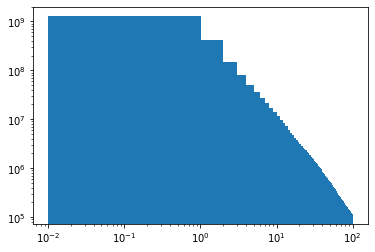

In [19]:
header_data = il.groupcat.loadHeader(basePath, snapNum)
h = header_data["HubbleParam"]

with h5py.File(f"subhalo_{id}.hdf5", "r") as file:
    print(file["99"].keys())
    print(file["99/dm"].keys())
    R = file["99/dm/Distance_to_center"][:]
    dm_mass = 3.1e5/h
    rcentres,bin_length,densities = density_calculation(R,weights=dm_mass, distrange=(1e-2,1e2), scale='linear')
    plt.bar(rcentres, densities, width=bin_length)
    plt.xscale('log')
    plt.yscale('log')

<KeysViewHDF5 ['dm', 'star']>
<KeysViewHDF5 ['Coordinates', 'Coordinates_centered', 'Distance_to_center', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'Velocities', 'count']>


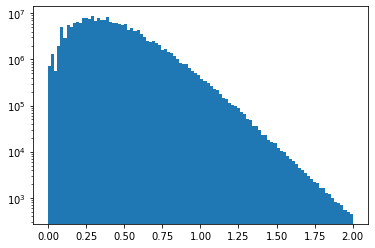

In [20]:
header_data = il.groupcat.loadHeader(basePath, snapNum)
h = header_data["HubbleParam"]

with h5py.File(f"subhalo_{id}.hdf5", "r") as file:
    print(file["99"].keys())
    print(file["99/dm"].keys())
    R = file["99/dm/Distance_to_center"][:]
    dm_mass = 3.1e5/h
    rcentres,bin_length,densities = density_calculation(R,weights=dm_mass, distrange=(0,2),bins=100)
    plt.bar(rcentres, densities, width=bin_length)
    plt.yscale('log')

In [21]:
def makemodel_empirical(rvals,dvals,pfile='',plabel = '',verbose=True):
    """make an EXP-compatible spherical basis function table

    inputs
    -------------
    rvals       : (array of floats) radius values to evaluate the density function
    pfile       : (string) the name of the output file. If '', will not print file
    plabel      : (string) comment string, printed to the top of the file
    verbose     : (boolean)

    outputs
    -------------
    R           : (array of floats) the radius values
    D           : (array of floats) the density
    M           : (array of floats) the mass enclosed
    P           : (array of floats) the potential

    """
    M = 1.
    R = np.nanmax(rvals)

    # query out the density values
    #dvals = D#func(rvals,*funcargs)
    #print(R.size,)

    # make the mass and potential arrays
    mvals = np.zeros(dvals.size)
    pvals = np.zeros(dvals.size)
    pwvals = np.zeros(dvals.size)

    # initialise the mass enclosed an potential energy
    mvals[0] = 1.e-15
    pwvals[0] = 0.

    # evaluate mass enclosed and potential energy by recursion
    for indx in range(1,dvals.size):
        mvals[indx] = mvals[indx-1] +\
          2.0*np.pi*(rvals[indx-1]*rvals[indx-1]*dvals[indx-1] +\
                 rvals[indx]*rvals[indx]*dvals[indx])*(rvals[indx] - rvals[indx-1]);
        pwvals[indx] = pwvals[indx-1] + \
          2.0*np.pi*(rvals[indx-1]*dvals[indx-1] + rvals[indx]*dvals[indx])*(rvals[indx] - rvals[indx-1]);

    # evaluate potential (see theory document)
    pvals = -mvals/(rvals+1.e-10) - (pwvals[dvals.size-1] - pwvals)

    # get the maximum mass and maximum radius
    M0 = mvals[dvals.size-1]
    R0 = rvals[dvals.size-1]

    # compute scaling factors
    Beta = (M/M0) * (R0/R);
    Gamma = np.sqrt((M0*R0)/(M*R)) * (R0/R);
    if verbose:
        print("! Scaling:  R=",R,"  M=",M)

    rfac = np.power(Beta,-0.25) * np.power(Gamma,-0.5);
    dfac = np.power(Beta,1.5) * Gamma;
    mfac = np.power(Beta,0.75) * np.power(Gamma,-0.5);
    pfac = Beta;

    if verbose:
        print(rfac,dfac,mfac,pfac)

    # save file if desired
    if pfile != '':
        f = open(pfile,'w')
        print('! ',plabel,file=f)
        print('! R    D    M    P',file=f)

        print(rvals.size,file=f)

        for indx in range(0,rvals.size):
            print('{0} {1} {2} {3}'.format( rfac*rvals[indx],\
              dfac*dvals[indx],\
              mfac*mvals[indx],\
              pfac*pvals[indx]),file=f)

        f.close()

    return rvals*rfac,dfac*dvals,mfac*mvals,pfac*pvals

In [10]:
basePath = '/virgotng/universe/IllustrisTNG/TNG50-1/output'
snapNum = 99
id = 372754

header_data = il.groupcat.loadHeader(basePath, snapNum)
h = header_data["HubbleParam"]

with h5py.File(f"subhalo_{id}.hdf5", "r") as file:
    print(file["99"].keys())
    print(file["99/dm"].keys())
    R = file["99/dm/Distance_to_center"][:]
    dm_mass = 3.1e5/h
    rcentres,bin_length,densities = density_calculation(R,weights=dm_mass, distrange=(0,2),bins=100)
    R,D,M,P = makemodel_empirical(10**rcentres,densities,pfile="GSEbasis_empirical.txt")

<KeysViewHDF5 ['dm', 'star']>
<KeysViewHDF5 ['Coordinates', 'Coordinates_centered', 'Distance_to_center', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'Velocities', 'count']>


NameError: name 'density_calculation' is not defined

In [1]:
import pyEXP
# now, let's generate a basis for GSE. These are the settings, no need to touch these for now.
gseE_config = """
id         : sphereSL
parameters :
  numr     : 4000
  rmin     : 1.5
  rmax     : 100.0
  Lmax     : 6
  nmax     : 20
  modelname : GSEbasis_empirical.txt
  cachename : GSEbasis.empirical.cache
"""
gseE_basis = pyEXP.basis.Basis.factory(gseE_config)

In [2]:
basis = gseE_basis.getBasis()

In [11]:
basePath = '/virgotng/universe/IllustrisTNG/TNG50-1/output'
snapNum = 99
id = 372754

header_data = il.groupcat.loadHeader(basePath, snapNum)
h = header_data["HubbleParam"]

with h5py.File(f"subhalo_{id}.hdf5", "r") as file:
    xpos = file['99/dm/Coordinates_centered'][:,0]
    ypos = file['99/dm/Coordinates_centered'][:,1]
    zpos = file['99/dm/Coordinates_centered'][:,2]
    mass = np.full(len(xpos),3.1e5/h)
    gseE_coef = gseE_basis.createFromArray(mass,[xpos,ypos,zpos], time=0.0)

RuntimeError: Basis::createCoefficients: basis <SphericalSL> not recognized
